# Capstone Project
#### Jupyter Notebook (2/4)

### Bruno Athayde e Silva - 448898

#### Data EDA using Python

---

### Table of Contents

### [Introduction](#introduction)

### [Methodology](#methodology)

   - [Step 1: Assess the distribution of the variables](#step_1)
   
   - [Step 2: Check the data type of the variables and convert to integers or floats, if necessary](#step_2)
   
   - [Step 3: Check the pairwise correlation of the variables and drop features with a high correlation, if necessary.](#step_3)
   
   - [Step 4: Convert categorical features into numeric](#step_4)
   
   - [Step 5: Define model variables and export the *.CSV* file](#step_5)
   
### [Next Steps](#next)

---

### Introduction
<a id = 'introduction'></a>

The first part of this Capstone Project was the Data Wrangling, and it was executed using MySQL, as explained in the previous Jupyter Notebook.

The second part, the Exploratory Data Analysis (EDA), will be executed using Python in this Jupyter Notebook. And I will start importing important libraries for this analysis, loading the CSV database derived from the MySql Data Wrangling, and then checking the distribution of the features. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the display to show every column and row
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

The function created below will take the DataFrame and plot the histogram of the features, so it is possible to verify the distribution o each feature.

In [3]:
# function to check the distribution of the dataframe

def check_distribution(dataframe, n_cols):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    
    columns_names = dataframe.columns
    plot_num = 1
    subplots_rows = int(len(tkt_pre.columns)/n_cols) + (len(tkt_pre.columns) % n_cols > 0)

    plt.subplots(subplots_rows, n_cols, figsize = (25, 15))

    for i in columns_names:
        plt.subplot(subplots_rows, n_cols, plot_num)
        sns.histplot(dataframe[i])
        plot_num += 1

    plt.tight_layout()
    plt.show()
    

As stated in the introduction, the file **'pre_covid_routeDB.csv'** is the database derived from ***MySQL***, making it more appropriate and valuable for analytics. 

In [4]:
# load the CSV data derived from MySQL 
tkt_pre = pd.read_csv('/Volumes/GoogleDrive/My Drive/BrainStation/CAPSTONE/DATABASE/CLEANED DATABASE/pre_covid_routeDB.csv',
                      delimiter = ';', 
                      index_col = 'ItinID')
# sanity check 
tkt_pre.head()


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/GoogleDrive/My Drive/BrainStation/CAPSTONE/DATABASE/CLEANED DATABASE/pre_covid_routeDB.csv'

In [ ]:
# check min and max of ItinFare feature
print(f"The cheapest itineray fare is: ${min(tkt_pre['ItinFare'])} \
and the most expensive itineray fare is: ${max(tkt_pre['ItinFare'])}.")

---

### Methodology
<a id = 'methodology'></a>

The EDA is an important part where the data is investigated, aiming better understand its distribution, the correlation, if any, amongst the variables and so on.

The EDA steps will be:
   - Assess the distribution of the variables.
   - Check the data type of the variables and convert them to integers or floats, if necessary.
   - Check the pairwise correlation of the variables and drop features with a high correlation, if necessary.
   - Convert categorical data into numeric using get_dummies and OneHotEnconder.
   - Define X and y, and export the *.CSV* files.

#### Data Dictionary

#### Features:

- **ItinID**: Itinerary Identification
- **_Year**: 2018 or 2019
- **_Quarter**: Fiscal Quarters (1 to 4)
- **RoundTrip**: Round Trip Indicator (Yes = 1)
- **RPCarrier**: Reporting Carrier (The carrier that submitted data to the Office of Airline Information for a given passenger segment)
	- **9E** - Endeavor Air Inc.
	- **AA** - American Airlines Inc.
	- **AS** - Alaska Airlines Inc.
	- **B6** - JetBlue Airways
	- **CP** - Alis Cargo Airlines S.P.A.
	- **DL** - Delta Air Lines Inc.
	- **EV** - ExpressJet Airlines LLC d/b/a aha!
	- **F9** - Frontier Airlines Inc.
	- **G4** - Allegiant Air
	- **G7** - GoJet Airlines LLC d/b/a United Express
	- **HA** - Hawaiian Airlines Inc.
	- **MQ** - Envoy Air
	- **NK** - Spirit Air Lines
	- **OH** - PSA Airlines Inc.
	- **OO** - SkyWest Airlines Inc.
	- **QX** - Horizon Air
	- **SY** - Sun Country Airlines d/b/a MN Airlines
	- **UA** - United Air Lines Inc.
	- **VX** - Virgin America
	- **WN** - Southwest Airlines Co.
	- **YV** - Mesa Airlines Inc.
	- **YX** - Republic Airline

- **Passengers**: Number of Passengers
- **ItinFare**: Itinerary Fare Per Person
- **Distance**: Itinerary Distance (Including Ground Transportation)
- **DistanceGroup**: Distance Group, in 500-Mile Intervals
- **MilesFlown**: Itinerary Miles Flown (Track Miles)
- **FareClass**: Fare Class Code (First Class = 1, Business Class = 2, Economy Class = 0)
- **Route**: Feature Created Using the Origin and Destination Airport Codes


#### Target:

- **FarePerMile**: Itinerary Fare Per Miles Flown in Dollars

#### Step 1: Assess the distribution of the variables
<a id = 'step_1'></a>

Using the function **check_distribution** created above, I will check how the features are distributed in the dataset.

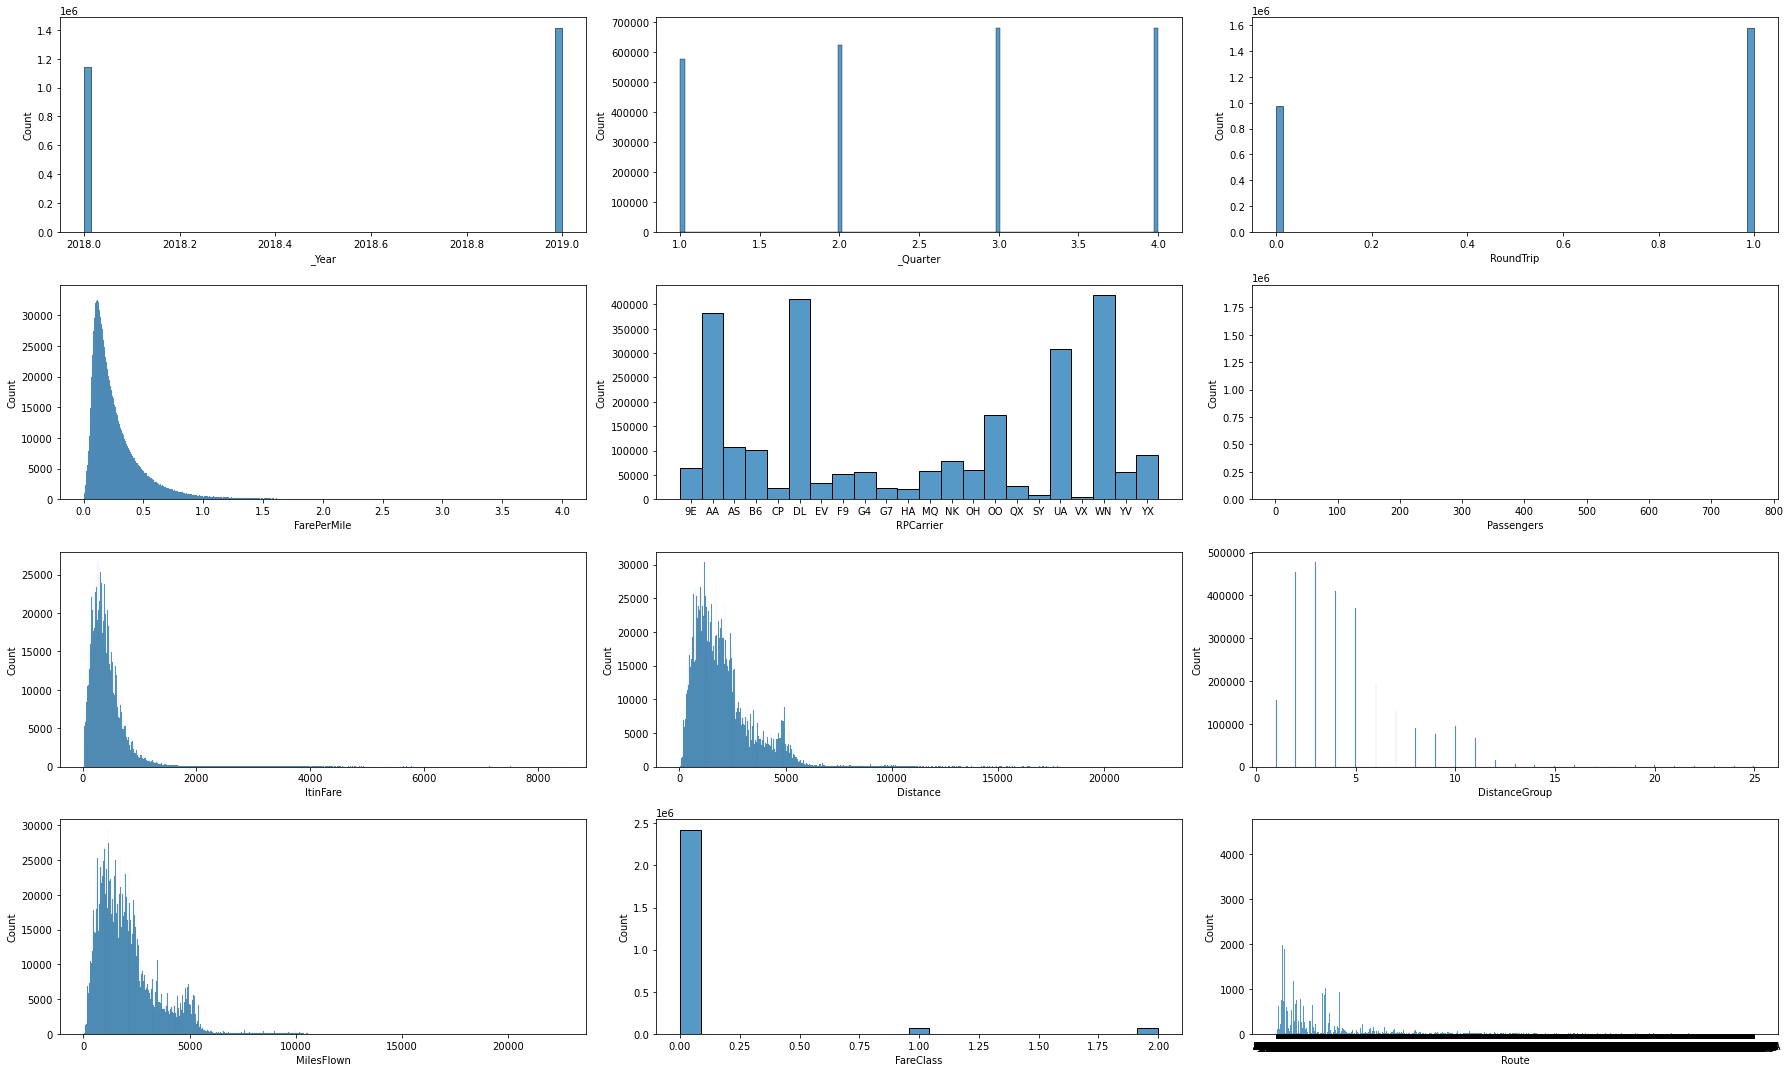

In [6]:
# check distribution of the features
check_distribution(tkt_pre, 3)

#### Step 2: Check the data type of the variables and convert to integers or floats, if necessary
<a id = 'step_2'></a>

In [7]:
# check the dataframe
tkt_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2560575 entries, 2018112 to 201945871562
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   _Year          int64  
 1   _Quarter       int64  
 2   RoundTrip      float64
 3   FarePerMile    float64
 4   RPCarrier      object 
 5   Passengers     float64
 6   ItinFare       float64
 7   Distance       float64
 8   DistanceGroup  int64  
 9   MilesFlown     float64
 10  FareClass      int64  
 11  Route          object 
dtypes: float64(6), int64(4), object(2)
memory usage: 254.0+ MB


Except for **'RPCarrier'** and **'Route'**, the data type of the features are all numeric and does not need any transformation. 

I will deal with these two categorical columns later on in this notebook.

#### Step 3: Check the pairwise correlation of the variables and drop features with a high correlation, if necessary.
<a id = 'step_3'></a>

<AxesSubplot:>

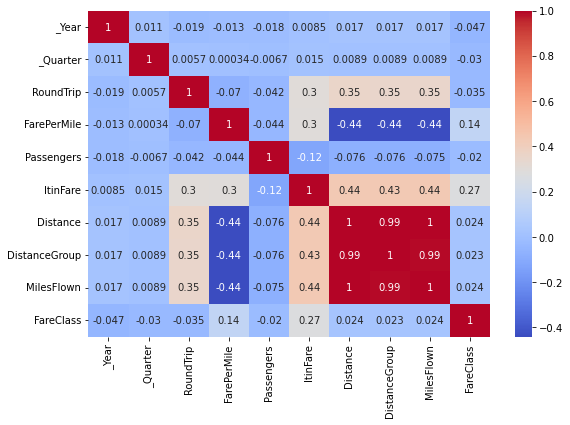

In [8]:
# get a heatmap with the correlation of the variables
plt.figure(figsize = (9, 6))
sns.heatmap(tkt_pre.corr(),
            annot = True,
            cmap = 'coolwarm')

As it is possible to see from the heatmap above, some features present a high correlation, and, in order to design a better model, those columns will be dropped, leaving only the ***MilesFlown*** column as a distance measure.

In [9]:
# drop columns with high correlation
tkt_pre = tkt_pre.drop(columns = ['ItinFare', 
                                  'DistanceGroup', 
                                  'Distance'])

After dropping those columns, I will recheck the heatmap as a sanity check.

<AxesSubplot:>

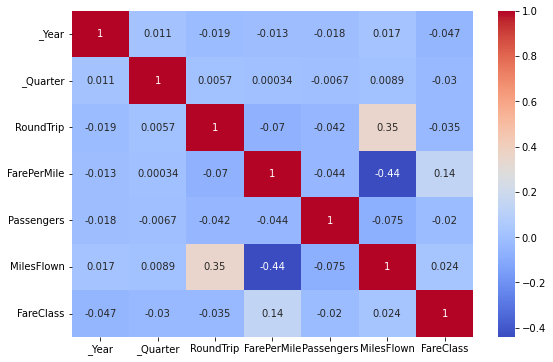

In [10]:
# get a heatmap with the correlation of the variables, after dropping columns
plt.figure(figsize = (9, 6))
sns.heatmap(tkt_pre.corr(),
            annot = True,
            cmap = 'coolwarm')

#### Step 4: Convert categorical features into numeric
<a id = 'step_4'></a>

For this step, I will start checking the number of unique routes and the number of flights in each way to determine which ones should be included in the model.

In [11]:
# create a dataframe with the number of unique routes and 
# the number of flights between origin and destination
count = pd.DataFrame(tkt_pre.groupby('Route')['Route'].count())
count = count.rename(columns = {count.columns[0]:"total"})
count

total
Route         
ABE-ABI      1
ABE-ABQ      5
ABE-AEX      1
ABE-AGS      6
ABE-ANC      5
ABE-ATL    212
ABE-ATW      2
ABE-AUS     20
ABE-AVL      6
ABE-AZO      3
ABE-BDL      1
ABE-BGR      1
ABE-BHM     13
ABE-BIL      1
ABE-BIS      1
ABE-BMI      1
ABE-BNA     43
ABE-BOI      2
ABE-BOS     16
ABE-BTR      5
ABE-BTV      1
ABE-BWI      1
ABE-BZN      3
ABE-CAE      8
ABE-CHA      5
ABE-CHS     18
ABE-CID      4
ABE-CLE      5
ABE-CLT    100
ABE-CMH     12
ABE-CMI      1
ABE-COS      3
ABE-COU      1
ABE-CPR      1
ABE-CRP      1
ABE-CRW      3
ABE-CVG      7
ABE-DAB     11
ABE-DAL      3
ABE-DAY      5
ABE-DBQ      1
ABE-DCA      2
ABE-DEN     40
ABE-DFW     35
ABE-DHN      1
ABE-DLH      1
ABE-DSM      9
ABE-DTW     39
ABE-ECP      3
ABE-ELP      5
ABE-EVV      3
ABE-EWN      5
ABE-EYW      8
ABE-FAR      3
ABE-FAT      1
ABE-FLL     98
ABE-FLO      3
ABE-FNT      1
ABE-FSD      2
ABE-FSM      1
ABE-FWA      1
ABE-GNV      4
ABE-GPT      2
ABE-GRB      6
ABE-GRK      1
ABE-GRR     10
ABE-GSO      8
ABE-GSP     17
ABE-GTR      1
ABE-HHH      1
ABE-HLN      1
ABE-HNL      3
ABE-HOU      3
ABE-HSV      5
ABE-HTS      1
ABE-IAH     28
ABE-ICT      4
ABE-ILM      4
ABE-IND     26
ABE-JAC      1
ABE-JAN      3
ABE-JAX     26
ABE-LAN      1
ABE-LAS     54
ABE-LAX     33
ABE-LEX      5
ABE-LFT      2
ABE-LIT      8
ABE-MAF      1
ABE-MBS      1
ABE-MCI     28
ABE-MCO     58
ABE-MDW      4
ABE-MEM      7
ABE-MGM      1
ABE-MHT      3
ABE-MIA     20
ABE-MKE     22
ABE-MLB     10
ABE-MLI      1
ABE-MLU      1
ABE-MOB      2
ABE-MRY      1
ABE-MSN     14
ABE-MSO      1
ABE-MSP     27
ABE-MSY     27
ABE-MYR     58
ABE-OAJ      1
ABE-OKC      6
ABE-OMA     11
ABE-ONT      1
ABE-ORD    118
ABE-ORF      6
ABE-PAH      1
ABE-PBI     29
ABE-PDX     14
ABE-PGD    127
ABE-PGV      2
ABE-PHX     34
ABE-PIA      2
ABE-PIE    122
ABE-PIT     16
ABE-PNS     12
ABE-PQI      1
ABE-PSP      1
ABE-PVD      3
ABE-PWM      2
ABE-RAP      3
ABE-RDU     16
ABE-RIC      1
ABE-RNO      2
ABE-ROC      1
ABE-RST      3
ABE-RSW     22
ABE-SAN     19
ABE-SAT     32
ABE-SAV     41
ABE-SBN      3
ABE-SDF     16
ABE-SEA     25
ABE-SFB    206
ABE-SFO     23
ABE-SGF      5
ABE-SHV      3
ABE-SJC     10
ABE-SJU      2
ABE-SLC     18
ABE-SMF      3
ABE-SNA     14
ABE-SRQ     12
ABE-STL     23
ABE-STT      1
ABE-SUX      1
ABE-SYR      1
ABE-TLH      3
ABE-TPA     40
ABE-TRI      2
ABE-TUL      8
ABE-TUS      9
ABE-TVC      3
ABE-TYS      4
ABE-VPS      4
ABE-XNA      6
ABI-ABQ      9
ABI-AEX      3
ABI-AGS      2
ABI-ALB      1
ABI-AMA      2
ABI-ANC      1
ABI-ASE      2
ABI-ATL     10
ABI-AUS      5
ABI-BDL      2
ABI-BFL      1
ABI-BHM      4
ABI-BIS      1
ABI-BMI      1
ABI-BNA     16
ABI-BOI      2
ABI-BOS      2
ABI-BRO      1
ABI-BTR      2
ABI-BTV      1
ABI-BUF      1
ABI-BWI      6
ABI-BZN      1
ABI-CHS      5
ABI-CID      1
ABI-CLE      5
ABI-CLT      5
ABI-CMH      5
ABI-COS      3
ABI-CRP      3
ABI-CVG      5
ABI-CYS      1
ABI-DAY      2
ABI-DCA     10
ABI-DEN     16
ABI-DFW     20
ABI-DRO      1
ABI-DSM      3
ABI-DTW      4
ABI-ECP      2
ABI-ELP      2
ABI-EWR      5
ABI-FAT      1
ABI-FLL      2
ABI-FSM      1
ABI-GJT      1
ABI-GRB      1
ABI-GSO      2
ABI-GSP      5
ABI-HNL      3
ABI-HOU      7
ABI-HSV      1
ABI-IAD      8
ABI-IAH      6
ABI-ICT      1
ABI-IND      2
ABI-JAN      1
ABI-JAX      1
ABI-JFK      2
ABI-KOA      1
ABI-LAS     25
ABI-LAX      8
ABI-LCH      2
ABI-LFT      2
ABI-LGA     11
ABI-LIT      3
ABI-MCI      7
ABI-MCO      6
ABI-MEM      6
ABI-MFE      1
ABI-MGM      2
ABI-MIA      1
ABI-MKE      3
ABI-MLU      1
ABI-MOB      3
ABI-MSN      2
ABI-MSP     11
ABI-MSY      7
ABI-MTJ      1
ABI-OGG      2
ABI-OKC      4
ABI-OMA      4
ABI-ONT      6
ABI-ORD     12
ABI-ORF      4
ABI-PBI      5
ABI-PDX      8
ABI-PHL      5
ABI-PHX      8
ABI-PIA      1
ABI-PIT      9
ABI-PNS      2
ABI-PSC      1
ABI-PSP      3
ABI-PUW      1
ABI-RAP      4
ABI-RDU      5
ABI-RIC      2
ABI-RNO      2
ABI-ROC      1
ABI-RSW      4
ABI-

In [12]:
# check dataframe
count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50812 entries, ABE-ABI to YUM-VPS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   total   50812 non-null  int64
dtypes: int64(1)
memory usage: 793.9+ KB


As we can see, the dataset provides more than **50,800** different routes; however, some routes appear just a few times and will be excluded from the dataset. And whichever routes that present less than **850** flights will be dropped.

***Disclaimer:*** *for this analysis, routes with opposite origins and destinations will be considered as two separate routes. For example, a flight **LAX-JFK** will not be added to a flight **JFK-LAX**. They will be regarded as two different routes.*

In [13]:
# check the number of routes with more than 850 flights
count[count['total'] > 850].count()

total    554
dtype: int64

In [14]:
# combine the count dataframe and the original tkt_pre dataframe
tkt_pre = tkt_pre.merge(count, 
                        left_on = 'Route', 
                        right_on = 'Route', 
                        how = 'left', 
                        indicator = True)


In [15]:
# check dataframe
tkt_pre.head()

_Year  _Quarter  RoundTrip  FarePerMile RPCarrier  Passengers  MilesFlown  \
0   2018         1        1.0       0.2457        9E         1.0      1384.0   
1   2018         1        1.0       0.3931        9E         1.0      1384.0   
2   2018         1        1.0       0.2042        9E         1.0      2414.0   
3   2018         1        1.0       0.3886        9E         1.0      2486.0   
4   2018         1        0.0       1.8483        9E         1.0       145.0   

   FareClass    Route  total _merge  
0          0  ABE-ATL    212   both  
1          0  ABE-ATL    212   both  
2          0  ABE-RSW     22   both  
3          0  ABE-SHV      3   both  
4          0  ABY-ATL      8   both

In [16]:
# drop rows where total number of flights is less than 850
tkt_pre = tkt_pre.drop(tkt_pre[tkt_pre['total'] < 850].index)
tkt_pre = tkt_pre.reset_index(drop = True)
tkt_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731515 entries, 0 to 731514
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   _Year        731515 non-null  int64   
 1   _Quarter     731515 non-null  int64   
 2   RoundTrip    731515 non-null  float64 
 3   FarePerMile  731515 non-null  float64 
 4   RPCarrier    731515 non-null  object  
 5   Passengers   731515 non-null  float64 
 6   MilesFlown   731515 non-null  float64 
 7   FareClass    731515 non-null  int64   
 8   Route        731515 non-null  object  
 9   total        731515 non-null  int64   
 10  _merge       731515 non-null  category
dtypes: category(1), float64(4), int64(4), object(2)
memory usage: 56.5+ MB


After checking the number of flights, I will convert the two categorical variables ***'FareClass'*** and ***'RPCarrier'*** into dummies using *get_dummies()*.

In [17]:
# get_dummies() --> 'FareClass' and 'RPCarrier'
tkt_pre = pd.get_dummies(tkt_pre, columns = ['FareClass', 
                                             'RPCarrier'])
tkt_pre.head()

_Year  _Quarter  RoundTrip  FarePerMile  Passengers  MilesFlown    Route  \
0   2018         1        1.0       0.1430         4.0      1378.0  ATL-IAH   
1   2018         1        1.0       0.1488         4.0      1378.0  ATL-IAH   
2   2018         1        1.0       0.1872         1.0      1378.0  ATL-IAH   
3   2018         1        1.0       0.2141         1.0      1378.0  ATL-IAH   
4   2018         1        1.0       0.2700         1.0      1378.0  ATL-IAH   

   total _merge  FareClass_0  FareClass_1  FareClass_2  RPCarrier_9E  \
0   1102   both            1            0            0             1   
1   1102   both            1            0            0             1   
2   1102   both            1            0            0             1   
3   1102   both            1            0            0             1   
4   1102   both            1            0            0             1   

   RPCarrier_AA  RPCarrier_AS  RPCarrier_B6  RPCarrier_CP  RPCarrier_DL  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_EV  RPCarrier_F9  RPCarrier_G4  RPCarrier_G7  RPCarrier_HA  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_MQ  RPCarrier_NK  RPCarrier_OH  RPCarrier_OO  RPCarrier_QX  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_SY  RPCarrier_UA  RPCarrier_VX  RPCarrier_WN  RPCarrier_YV  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_YX  
0             0  
1             0  
2             0  
3             0  
4             0

In [18]:
# drop '_merge' column
tkt_pre = tkt_pre.drop(columns = ['_merge'])
tkt_pre.head()

_Year  _Quarter  RoundTrip  FarePerMile  Passengers  MilesFlown    Route  \
0   2018         1        1.0       0.1430         4.0      1378.0  ATL-IAH   
1   2018         1        1.0       0.1488         4.0      1378.0  ATL-IAH   
2   2018         1        1.0       0.1872         1.0      1378.0  ATL-IAH   
3   2018         1        1.0       0.2141         1.0      1378.0  ATL-IAH   
4   2018         1        1.0       0.2700         1.0      1378.0  ATL-IAH   

   total  FareClass_0  FareClass_1  FareClass_2  RPCarrier_9E  RPCarrier_AA  \
0   1102            1            0            0             1             0   
1   1102            1            0            0             1             0   
2   1102            1            0            0             1             0   
3   1102            1            0            0             1             0   
4   1102            1            0            0             1             0   

   RPCarrier_AS  RPCarrier_B6  RPCarrier_CP  RPCarrier_DL  RPCarrier_EV  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_F9  RPCarrier_G4  RPCarrier_G7  RPCarrier_HA  RPCarrier_MQ  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_NK  RPCarrier_OH  RPCarrier_OO  RPCarrier_QX  RPCarrier_SY  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_UA  RPCarrier_VX  RPCarrier_WN  RPCarrier_YV  RPCarrier_YX  
0             0             0             0             0             0  
1             0             0             0             0             0  
2             0             0             0             0             0  
3             0             0             0             0             0  
4             0             0             0             0             0

Now, I will use the OneHotEncoder to encode the categorical ***'Route'*** column into a one-hot binary column. 

First, I will slice the original dataframe creating a new dataframe containing only the ***'Route'*** column, then I will pass the **OneHotEncoder** to that new dataframe and lastly, re-join this dataframe with the original one. 

In [19]:
# slice the original dataframe and create another one out of the 'Routes' column
routes_df = pd.DataFrame(tkt_pre['Route'])
routes_df.head()

Route
0  ATL-IAH
1  ATL-IAH
2  ATL-IAH
3  ATL-IAH
4  ATL-IAH

In [20]:
# check dataframe
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731515 entries, 0 to 731514
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Route   731515 non-null  object
dtypes: object(1)
memory usage: 5.6+ MB


In [21]:
from sklearn.preprocessing import OneHotEncoder
# instantiate the model
ohe = OneHotEncoder()

# fit the model
ohe_array = ohe.fit_transform(routes_df)
ohe_df = pd.DataFrame(ohe_array.toarray(), columns = ohe.categories_, dtype = int)
ohe_df.columns = [''.join(col) for col in ohe_df.columns]

In [22]:
# check dataframe
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731515 entries, 0 to 731514
Columns: 555 entries, ATL-BOS to TPA-PHL
dtypes: int64(555)
memory usage: 3.0 GB


In [23]:
# merge with original dataframe
tkt_final = tkt_pre.join(ohe_df)
tkt_final.head(3)

_Year  _Quarter  RoundTrip  FarePerMile  Passengers  MilesFlown    Route  \
0   2018         1        1.0       0.1430         4.0      1378.0  ATL-IAH   
1   2018         1        1.0       0.1488         4.0      1378.0  ATL-IAH   
2   2018         1        1.0       0.1872         1.0      1378.0  ATL-IAH   

   total  FareClass_0  FareClass_1  FareClass_2  RPCarrier_9E  RPCarrier_AA  \
0   1102            1            0            0             1             0   
1   1102            1            0            0             1             0   
2   1102            1            0            0             1             0   

   RPCarrier_AS  RPCarrier_B6  RPCarrier_CP  RPCarrier_DL  RPCarrier_EV  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   RPCarrier_F9  RPCarrier_G4  RPCarrier_G7  RPCarrier_HA  RPCarrier_MQ  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   RPCarrier_NK  RPCarrier_OH  RPCarrier_OO  RPCarrier_QX  RPCarrier_SY  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   RPCarrier_UA  RPCarrier_VX  RPCarrier_WN  RPCarrier_YV  RPCarrier_YX  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   ATL-BOS  ATL-BWI  ATL-DCA  ATL-DEN  ATL-DFW  ATL-DTW  ATL-EWR  ATL-FLL  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   ATL-HOU  ATL-IAH  ATL-LAS  ATL-LAX  ATL-LGA  ATL-MCO  ATL-MDW  ATL-MIA  \
0        0        1        0        0        0        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        1        0        0        0        0        0        0   

   ATL-MSP  ATL-MSY  ATL-ORD  ATL-PHL  ATL-PHX  ATL-SEA  ATL-SFO  ATL-TPA  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   AUS-ATL  AUS-BOS  AUS-DEN  AUS-EWR  AUS-JFK  AUS-LAS  AUS-LAX  AUS-MCO  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   AUS-ORD  AUS-SEA  AUS-SFO  BDL-FLL  BDL-MCO  BDL-TPA  BNA-BOS  BNA-LAX  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   BNA-LGA  BOI-SEA  BOS-ATL  BOS-AUS  BOS-BNA  BOS-CLT  BOS-DCA  BOS-DEN  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   BOS-DFW  BOS-DTW  BOS-EWR  BOS-FLL  BOS-LAS  BOS-LAX  BOS-LGA  BOS-MCO  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

  

 #### Step 5: Define model variables and export the *.CSV* file
<a id = 'step_5'></a>

The last part of this EDA notebook is going to be defining X and y and write them to a **.csv** file to be used later on my model.

In [24]:
# define X and y
X = tkt_final.drop(columns = ['FarePerMile', 'Route', 'total'])
y = tkt_final['FarePerMile']

In [25]:
# check the dataframe
X.head()

_Year  _Quarter  RoundTrip  Passengers  MilesFlown  FareClass_0  \
0   2018         1        1.0         4.0      1378.0            1   
1   2018         1        1.0         4.0      1378.0            1   
2   2018         1        1.0         1.0      1378.0            1   
3   2018         1        1.0         1.0      1378.0            1   
4   2018         1        1.0         1.0      1378.0            1   

   FareClass_1  FareClass_2  RPCarrier_9E  RPCarrier_AA  RPCarrier_AS  \
0            0            0             1             0             0   
1            0            0             1             0             0   
2            0            0             1             0             0   
3            0            0             1             0             0   
4            0            0             1             0             0   

   RPCarrier_B6  RPCarrier_CP  RPCarrier_DL  RPCarrier_EV  RPCarrier_F9  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_G4  RPCarrier_G7  RPCarrier_HA  RPCarrier_MQ  RPCarrier_NK  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_OH  RPCarrier_OO  RPCarrier_QX  RPCarrier_SY  RPCarrier_UA  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   RPCarrier_VX  RPCarrier_WN  RPCarrier_YV  RPCarrier_YX  ATL-BOS  ATL-BWI  \
0             0             0             0             0        0        0   
1             0             0             0             0        0        0   
2             0             0             0             0        0        0   
3             0             0             0             0        0        0   
4             0             0             0             0        0        0   

   ATL-DCA  ATL-DEN  ATL-DFW  ATL-DTW  ATL-EWR  ATL-FLL  ATL-HOU  ATL-IAH  \
0        0        0        0        0        0        0        0        1   
1        0        0        0        0        0        0        0        1   
2        0        0        0        0        0        0        0        1   
3        0        0        0        0        0        0        0        1   
4        0        0        0        0        0        0        0        1   

   ATL-LAS  ATL-LAX  ATL-LGA  ATL-MCO  ATL-MDW  ATL-MIA  ATL-MSP  ATL-MSY  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   ATL-ORD  ATL-PHL  ATL-PHX  ATL-SEA  ATL-SFO  ATL-TPA  AUS-ATL  AUS-BOS  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4   

In [26]:
# check the dataframe
y.head()

0    0.1430
1    0.1488
2    0.1872
3    0.2141
4    0.2700
Name: FarePerMile, dtype: float64

In [27]:
# write to .csv file
X.to_csv('/Volumes/GoogleDrive/My Drive/BrainStation/CAPSTONE/DATABASE/FINAL/tkt_final_X.csv')
y.to_csv('/Volumes/GoogleDrive/My Drive/BrainStation/CAPSTONE/DATABASE/FINAL/tkt_final_Y.csv')

---

### Next Steps
<a id = 'next'></a>

In the next Jupyter Notebook, I will utilize the final dataset obtained from this EDA.

The following steps aim to find the most suitable XGBoost model, tuning the most appropriate hyperparameters.

---